In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline

# Now read the 'Bigmart Sales Dataset' which Depicts various attributes regarding the sales of many products at 10 stores across different cities and view its first few rows

In [5]:
bigmartdata = pd.read_csv('C://Users//A-4//Desktop//Exploratory-Data-Analysis-of-Bigmart-Sales-Dataset-master//bigmart_data.csv')
bigmartdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# We see that there are missing values in dataset, so let us drop those rows and reset index

In [6]:
bigmartdata.dropna(axis = 0, how = 'any',inplace = True)
bigmartdata.reset_index(drop = True)
bigmartdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [7]:
#Let us look how the 'Item_Outlet Sales' and 'Item_MRP' vary with Item Type 

# Item Type VS Item MRP

In [8]:
price_by_item = bigmartdata.groupby('Item_Type').Item_MRP.mean()
price_by_item

Item_Type
Baking Goods             125.795653
Breads                   141.300639
Breakfast                134.090683
Canned                   138.551179
Dairy                    149.481471
Frozen Foods             140.095830
Fruits and Vegetables    145.418257
Hard Drinks              140.102908
Health and Hygiene       131.437324
Household                149.884244
Meat                     140.279344
Others                   137.640870
Seafood                  146.595782
Snack Foods              147.569955
Soft Drinks              130.910182
Starchy Foods            151.256747
Name: Item_MRP, dtype: float64

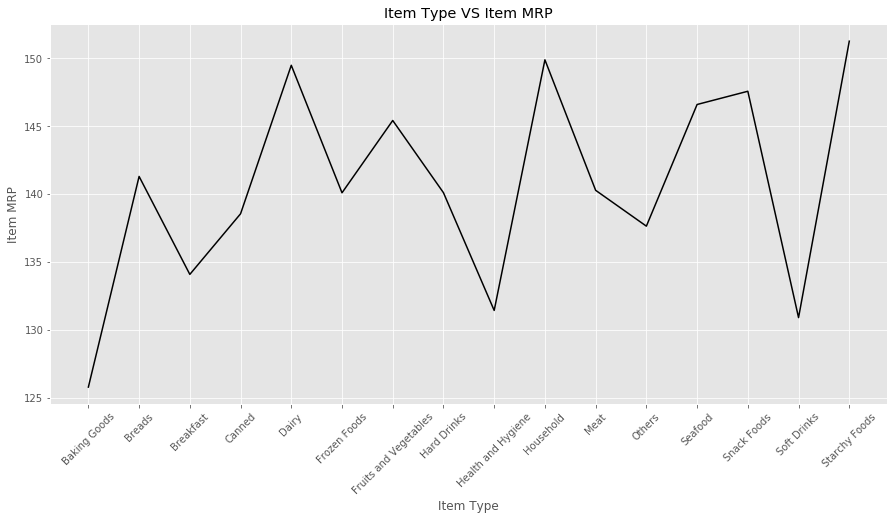

In [9]:
plt.style.use('ggplot')
x = price_by_item.index.tolist()
y = price_by_item.values.tolist()
plt.figure(figsize = (15,7))
plt.xlabel('Item Type')
plt.ylabel('Item MRP')
plt.title('Item Type VS Item MRP')
plt.xticks(ticks = np.arange(len(x)), labels = x, rotation = 45)
plt.plot(x,y,'k-')

# By Plotting Line chart between Item Type and Item MRP we observe following facts

        1.) The Mean price of Starchy Foods leads the group, which is closely followed by the Price of Household item
            dairy products
            
        2.) Baking Goods, health and hygiene products and softdrinks have low MRP

# Item_Type Vs Item_outlet_sales

In [10]:
sales_by_item = bigmartdata.groupby('Item_Type').Item_Outlet_Sales.mean()
sales_by_item

Item_Type
Baking Goods             2046.798187
Breads                   2389.702474
Breakfast                2203.166638
Canned                   2205.210750
Dairy                    2337.420556
Frozen Foods             2222.011887
Fruits and Vegetables    2312.703005
Hard Drinks              2233.275299
Health and Hygiene       2138.071282
Household                2386.554752
Meat                     2250.096708
Others                   2194.191457
Seafood                  2782.236970
Snack Foods              2391.146609
Soft Drinks              2050.338007
Starchy Foods            2483.778379
Name: Item_Outlet_Sales, dtype: float64

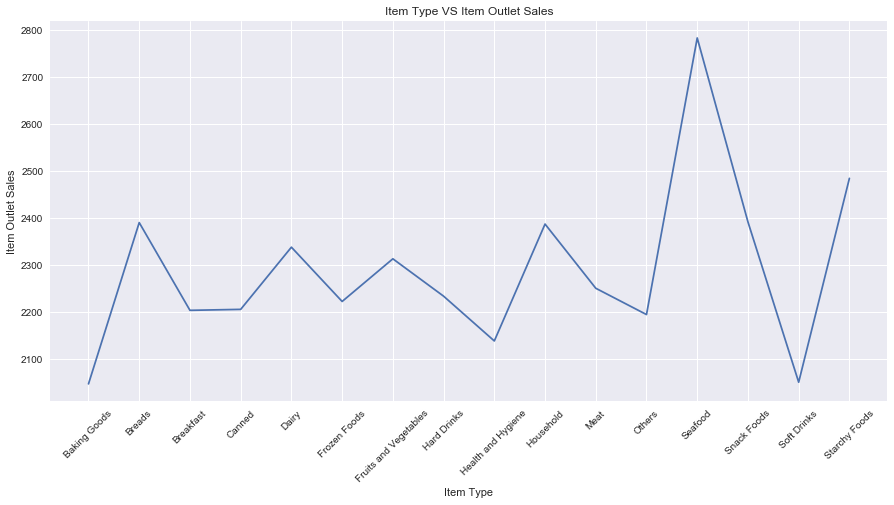

In [11]:
plt.style.use('seaborn')
x = sales_by_item.index.tolist()
y = sales_by_item.values.tolist()
plt.figure(figsize = (15,7))
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.title('Item Type VS Item Outlet Sales')
plt.xticks(ticks = np.arange(len(x)), labels = x, rotation = 45)
plt.plot(x,y)

# Comparing The above 2 Plot shows us very Interesting feature..

    1.)Although The price of Starchy Food is highest but it clearly doesnt dominate Outlet_Sales...

    2.)We Can clearly observe that the Outlet_sales of Seafood is highest , eventhough its price is not highest which shows 
       shows that it is a profitable business
   
    3.)Baking Goods trade will obviously at loss because even though it has lowest price, its sales is lowest.

# Now Let us check how the Outlet_sales are for each type of Outlet_size of stores

# Outlet_Size VS Item_Outlet_Sales

In [12]:
sales_by_size = bigmartdata.groupby('Outlet_Size').Item_Outlet_Sales.mean()
sales_by_size.sort_values(inplace = True)

<BarContainer object of 3 artists>

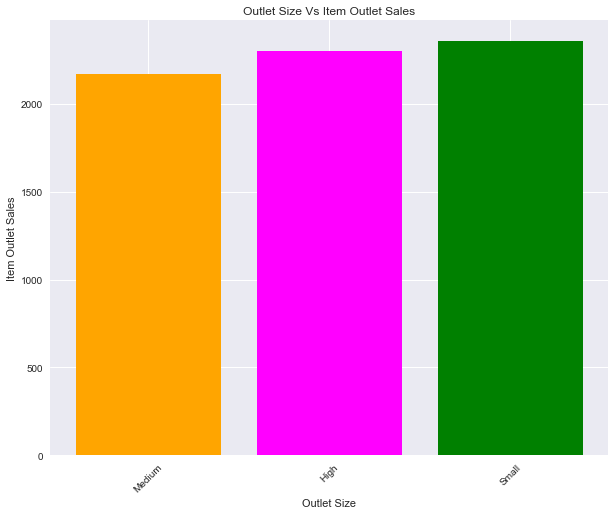

In [13]:
plt.figure(figsize = (10,8))
x = sales_by_size.index.tolist()
y = sales_by_size.values.tolist()
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.title('Outlet Size Vs Item Outlet Sales')
plt.xticks(ticks = np.arange(len(x)), labels = x, rotation = 45)
plt.bar(x,y, color = ['orange','magenta','green'])

# Frequency Distribution of Item_MRP

(array([247., 249., 208.,  94., 261., 329., 337., 343., 164., 279., 304.,
        276., 339., 318., 113., 143., 171., 145., 148., 182.]),
 array([ 31.49   ,  43.25992,  55.02984,  66.79976,  78.56968,  90.3396 ,
        102.10952, 113.87944, 125.64936, 137.41928, 149.1892 , 160.95912,
        172.72904, 184.49896, 196.26888, 208.0388 , 219.80872, 231.57864,
        243.34856, 255.11848, 266.8884 ]),
 <a list of 20 Patch objects>)

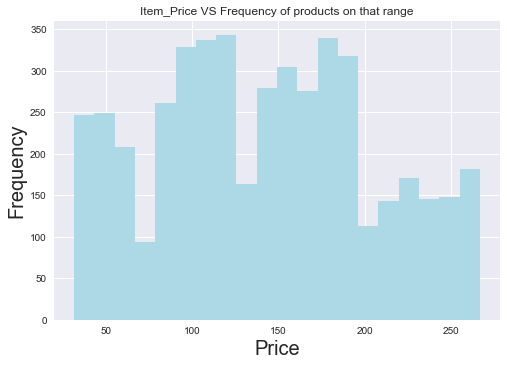

In [14]:
# plt.figure(figsize = (9,8))
plt.style.use('seaborn')
plt.title('Item_Price VS Frequency of products on that range')
plt.xlabel('Price',fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.hist(bigmartdata['Item_MRP'], bins = 20, color = 'lightblue')

# Density Distrubution of Item_Weight and Item_MRP

{'bodies': [<matplotlib.collections.PolyCollection at 0x8e54da0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x8dd9400>,
 'cmins': <matplotlib.collections.LineCollection at 0x8e6b2e8>,
 'cbars': <matplotlib.collections.LineCollection at 0x8e6b160>}

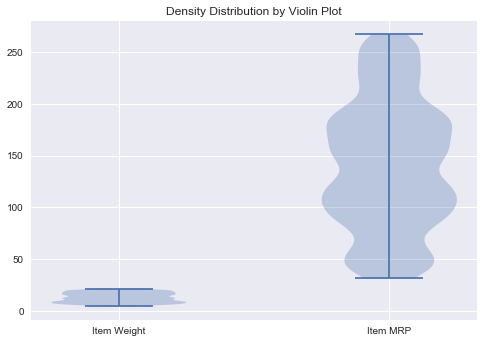

In [15]:
ds = bigmartdata[['Item_Weight','Item_MRP']]
plt.title('Density Distribution by Violin Plot')
plt.xticks(ticks = [1,2], labels = ['Item Weight','Item MRP'])
plt.violinplot(ds.values)

# Item MRP vs Item Outlet Sales vs Item Visibility

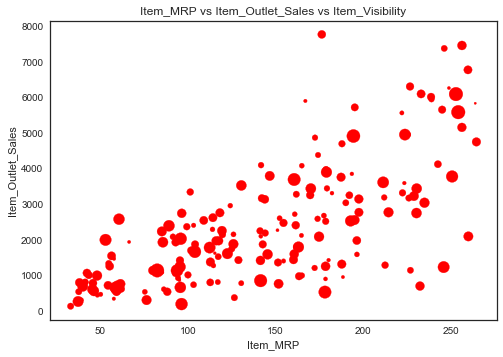

In [16]:
plt.style.use('seaborn-white')
plt.title('Item_MRP vs Item_Outlet_Sales vs Item_Visibility')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.scatter(bigmartdata['Item_MRP'][:200], bigmartdata['Item_Outlet_Sales'][:200], s = bigmartdata['Item_Visibility'][:200]*1000, color = 'Red')

# Relation Between Outlet_Location_Type and Outlet_Size

In [17]:
table = pd.crosstab(bigmartdata['Outlet_Size'], bigmartdata['Outlet_Location_Type'], margins = True)
table

Outlet_Location_Type,Tier 1,Tier 2,Tier 3,All
Outlet_Size,,,,
High,0,0,932,932
Medium,930,0,928,1858
Small,930,930,0,1860
All,1860,930,1860,4650


In [18]:
t1_x = table.loc[['High','Medium','Small'],'Tier 1'].index.tolist()
t1_y = table.loc[['High','Medium','Small'],'Tier 1'].values.tolist()
t2_x = table.loc[['High','Medium','Small'],'Tier 2'].index.tolist()
t2_y = table.loc[['High','Medium','Small'],'Tier 2'].values.tolist()
t3_x = table.loc[['High','Medium','Small'],'Tier 3'].index.tolist()
t3_y = table.loc[['High','Medium','Small'],'Tier 3'].values.tolist()

<BarContainer object of 3 artists>

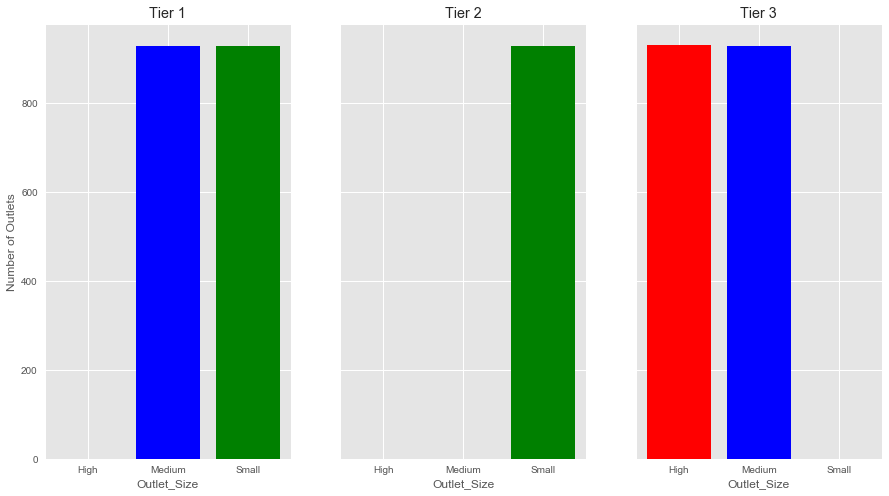

In [19]:
plt.style.use('ggplot')
fig,ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,8), sharey = True)
ax[0].set_title('Tier 1')
ax[1].set_title('Tier 2')
ax[2].set_title('Tier 3')

ax[0].set_xlabel('Outlet_Size')
ax[1].set_xlabel('Outlet_Size')
ax[2].set_xlabel('Outlet_Size')
ax[0].set_ylabel('Number of Outlets')

ax[0].set_xticks([0,1,2])
ax[1].set_xticks([0,1,2])
ax[2].set_xticks([0,1,2])

ax[0].set_xticklabels(['High','Medium','Small'])
ax[1].set_xticklabels(['High','Medium','Small'])
ax[2].set_xticklabels(['High','Medium','Small'])

ax[0].bar(t1_x,t1_y, color = ['Red','Blue','Green'])
ax[1].bar(t2_x,t2_y, color = ['Red','Blue','Green'])
ax[2].bar(t3_x,t3_y, color = ['Red','Blue','Green'])

# Outlet Establishment Year vs Item outlet sales

In [20]:
price_by_year = bigmartdata.groupby('Outlet_Establishment_Year').Item_Outlet_Sales.mean()
price_by_year.sort_index(inplace = True)

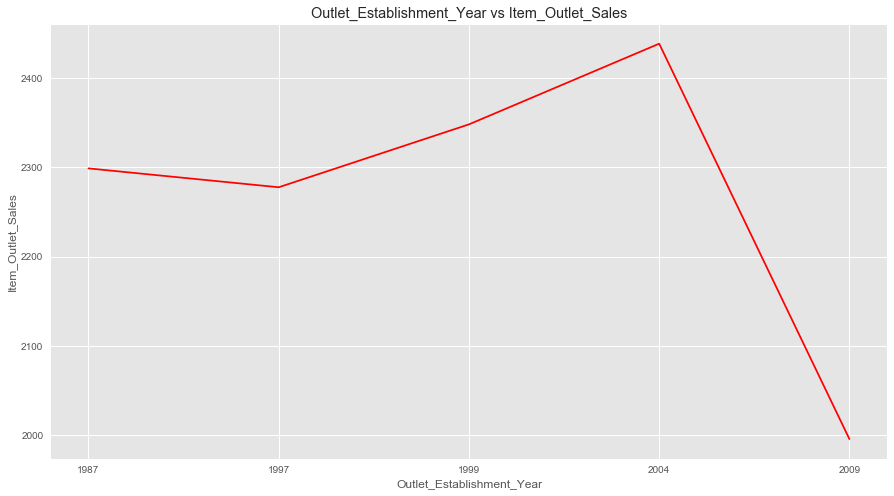

In [21]:
plt.style.use('ggplot')
plt.figure(figsize = (15,8))
x = price_by_year.index.map(lambda x : str(x)).tolist()
y = price_by_year.values.tolist()
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet_Establishment_Year vs Item_Outlet_Sales')
plt.xticks(ticks = np.arange(len(x)), labels = x)
plt.plot(x,y,'r')

# Method To Prepare Data For Machine Learning Algorithm


# In Below Example it is depicted how to convert catagorical variables to numbers for 'Outlet_Size' attribute..


In [22]:
bigmartdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [23]:
def preparedata(x):
    if x == 'High':
        return 3
    elif x == 'Medium':
        return 2
    elif x == 'Small':
        return 1

In [24]:
newdata = bigmartdata
newdata['Outlet_Size'] = newdata['Outlet_Size'].apply(preparedata)

In [25]:
newdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,3,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,2,Tier 3,Supermarket Type2,556.6088
